<a href="https://colab.research.google.com/github/rubenbuelvas/IA-Notebook/blob/master/IA_Notebook_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

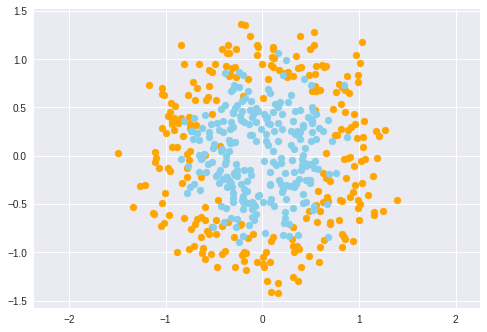

In [2]:
# Dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.2)
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="orange")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="skyblue")
plt.axis("equal")

plt.show()

In [0]:
# Network layer class

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 - 1
    self.W = np.random.rand(n_conn, n_neur)*2 - 1

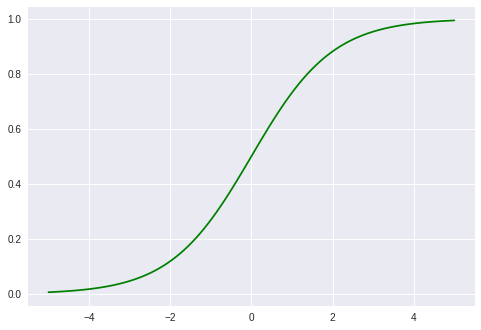

In [4]:
# Activation functions

# [0] f(x), [1] f'(x)

sigm = (lambda x: 1/(1 + np.e**(-x)),
        lambda x: x*(1 - x)        )

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x), c="green")
plt.show()

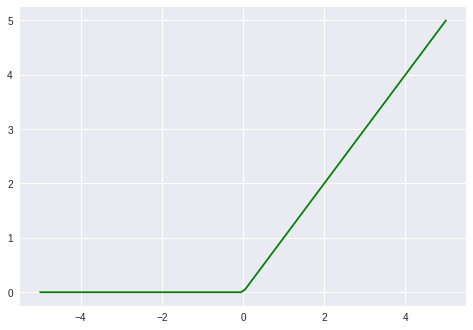

In [5]:
relu = (lambda x: np.maximum(0, x),
        lambda x: x*(1 - x)      )
        
plt.plot(_x, relu[0](_x), c="green")
plt.show()

In [0]:
# Data structure of the neural net

def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn

topology = [p, 5, 5, 1]

nn = create_nn(topology, sigm)

In [0]:
# Cost function

l2_cost = (lambda Yp, Yr: (np.mean((Yp - Yr)**2)),
           lambda Yp, Yr: (Yp - Yr)             )

In [8]:
def train(nn, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(nn):
  
    z = out[-1][1] @ nn[l].W + nn[l].b
    a = nn[l].act_f[0](z)
  
    out.append((z, a))
    
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(nn))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(nn) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * nn[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * nn[l].act_f[1](a))
       
      _W = nn[l].W
 
      # Gradient descent
      nn[l].b = nn[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      nn[l].W = nn[l].W - out[l][1].T @ deltas[0] * lr
      
  return out[-1][1]
  
  
train(nn, X, Y, l2_cost, 0.5)
print("")

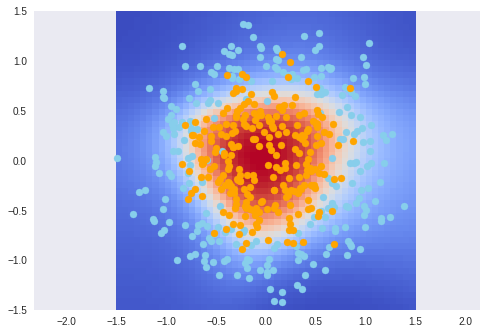

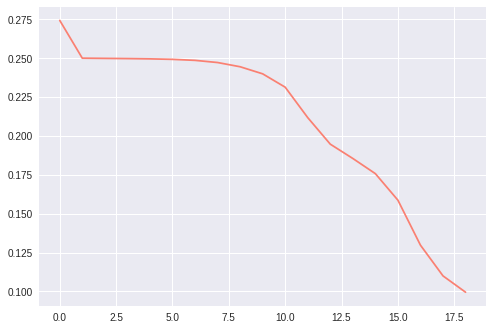

Cycles: 1800


In [9]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(25000):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.01)
  
  if i % 100 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="orange")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss, c="salmon")
    plt.show()
    time.sleep(0.5)  
    if loss[-1] < 0.1:
      print("Cycles: " + str(i))
      break